### Problem Statement
You are a data scientist working for a school

You are asked to predict the GPA of the current students based on the following provided data:

 0   StudentID  int64  
 1   Age    int64  
 2   Gender int64  
 3   Ethnicity  int64  
 4   ParentalEducation  int64  
 5   StudyTimeWeekly    float64
 6   Absences   int64  
 7   Tutoring   int64  
 8   ParentalSupport    int64  
 9   Extracurricular    int64  
 10  Sports int64  
 11  Music  int64  
 12  Volunteering   int64  
 13  GPA    float64
 14  GradeClass float64

The GPA is the Grade Point Average, typically ranges from 0.0 to 4.0 in most educational systems, with 4.0 representing an 'A' or excellent performance.

The minimum passing GPA can vary by institution, but it's often around 2.0. This usually corresponds to a 'C' grade, which is considered satisfactory.

You need to create a Deep Learning model capable to predict the GPA of a Student based on a set of provided features.
The data provided represents 2,392 students.

In this excersice you will be requested to create a total of three models and select the most performant one.


### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 2) Load Data

- You will be provided with a cvs (comma separated value) file.
- You will need to add that file into a pandas dataframe, you can use the following code as reference
- The file will be available in canvas

In [2]:
data = pd.read_csv("/content/Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


### 3) Review you data:

Make sure you review your data.
Place special attention of null or empty values.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 4. Remove the columns not needed for Student performance prediction

- Choose only the columns you consider to be valuable for your model training.
- For example, StudentID might not be a good feature for your model, and thus should be removed from your main dataset, which other columns should also be removed?
- You can name that final dataset as 'dataset'

In [10]:
# Your code here
dataset = data.drop(['StudentID', 'Gender', 'Ethnicity'], axis=1)

### 5. Check if the columns has any null values:
- Here you now have your final dataset to use in your model training.
- Before moving foward review your data check for any null or empty value that might be needed to be removed

In [11]:
# Your code here
dataset.isnull().sum()

,0
Age,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0
Sports,0
Music,0
Volunteering,0


### 6. Prepare your data for training and for testing set:
 - First create a dataset named X, with all columns but GPA. These are the features
 - Next create another dataset named y, with only GPA column. This is the label
 - If you go to your Imports, you will see the following import: **'from sklearn.model_selection import train_test_split'**
 - Use that *train_test_split* function to create: X_train, X_test, y_train and y_test respectively. Use X and y datasets as parameters. Other parameters to use are: Test Size = 0.2, Random State = 42.

 - Standarize your features (X_train and X_test) by using the StandardScaler (investigate how to use fit_transform and transform functions). This will help the training process by dealing with normilized data.

 Note: Your X_train shape should be around (1913, 10). This means the dataset has 10 columns which should be the input.

In [13]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Crear el dataset X con todas las columnas excepto 'GPA' (las características)
X = dataset.drop(['GPA'], axis=1)

# Crear el dataset y con solo la columna 'GPA' (la etiqueta)
y = dataset['GPA']

# Dividir los datos en conjuntos de entrenamiento y prueba con train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar la forma de los conjuntos para asegurarse que X_train tiene 11 columnas
print(f"X_train shape: {X_train.shape}")  # Debería ser (1913, 11)

# Estandarizar las características (X_train y X_test) usando StandardScaler
scaler = StandardScaler()

# Ajustar y transformar el conjunto de entrenamiento
X_train = scaler.fit_transform(X_train)

# Transformar el conjunto de prueba con el mismo escalador
X_test = scaler.transform(X_test)

X_train shape: (1913, 11)


### 7. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention of 10 and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with 1 unit, do not define an activation function so it defaults to linear, suitable for regression tasks. e.g. Dense(1)

This last part of the output layer is super important, since we want to predict the GPA, this means that we want a regression and not a classification. Linear activation function is best for regression and Sigmoid is best for Binary Classification

In [15]:
# Your code here

# Definir la Red Neuronal Secuencial
model = Sequential([
    Dense(64, input_dim=11, activation='relu'),  # Capa de entrada con 64 unidades y dimensión de entrada de 11
    Dense(32, activation='relu'),  # Capa oculta con 32 unidades y función de activación ReLU
    Dense(1)  # Capa de salida con 1 unidad (predicción de GPA), sin especificar activación (lineal por defecto)
])

### 8. Compile your Neural Network
- Choose Adam as the optimizer
- And MSE as the Loss function
- Also add the following metrics: Mean Absolute Error

In [16]:
# Your code here

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Mostrar la arquitectura del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

### 9. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [17]:
# Your code here

# Entrenar el modelo con X_train y y_train
history = model.fit(
    X_train,              # Conjunto de entrenamiento de características
    y_train,              # Conjunto de entrenamiento de etiquetas (GPA)
    epochs=50,            # Número de iteraciones (épocas)
    batch_size=10,        # Tamaño del batch
    validation_split=0.2, # Porcentaje de datos de entrenamiento para validación
    verbose=1             # Mostrar el progreso durante el entrenamiento
)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.1602 - mean_absolute_error: 1.1338 - val_loss: 0.1402 - val_mean_absolute_error: 0.3019
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1090 - mean_absolute_error: 0.2659 - val_loss: 0.0828 - val_mean_absolute_error: 0.2327
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0678 - mean_absolute_error: 0.2109 - val_loss: 0.0683 - val_mean_absolute_error: 0.2128
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0570 - mean_absolute_error: 0.1930 - val_loss: 0.0621 - val_mean_absolute_error: 0.2012
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0482 - mean_absolute_error: 0.1762 - val_loss: 0.0579 - val_mean_absolute_error: 0.1946
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0439 - mean_absolute_error: 0.1676 - val_loss: 0.0551 - val_mean_absolute_error: 0.1914
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0413 - mean_absolute_error: 0.1620 - v

### 10. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Training and Validation Loss over Epochs
- In a second graph:
   - Plot the Training MAE and the Validation MAE
   - X Label = Epochs
   - Y Label = Mean Absolute Error (MAE)
   - Title = Training and Validation MAE over Epochs

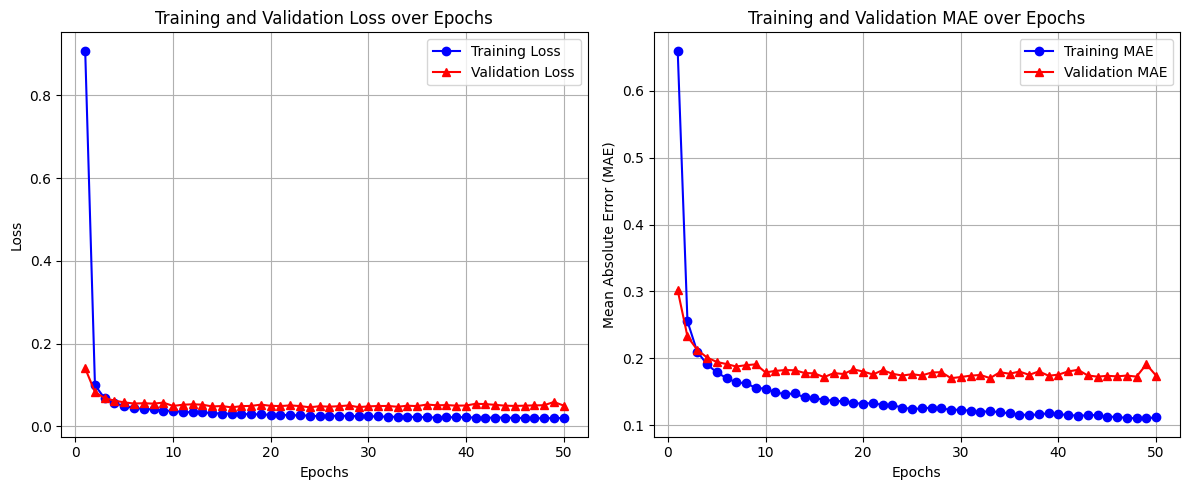

In [18]:
# Your code here

# Obtener los datos del historial de entrenamiento
history_dict = history.history

# Extraer los datos para los gráficos
loss = history_dict['loss']  # Pérdida en entrenamiento
val_loss = history_dict['val_loss']  # Pérdida en validación
mae = history_dict['mean_absolute_error']  # MAE en entrenamiento
val_mae = history_dict['val_mean_absolute_error']  # MAE en validación

# Crear una lista de épocas para el eje X
epochs = range(1, len(loss) + 1)

# Gráfico 1: Pérdida de entrenamiento y validación
plt.figure(figsize=(12, 5))  # Definir el tamaño de la figura

plt.subplot(1, 2, 1)  # Crear un subplot para el primer gráfico
plt.plot(epochs, loss, 'bo-', label='Training Loss')  # 'bo-' = círculo azul para Training Loss
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')  # 'r^-' = triángulo rojo para Validation Loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()  # Mostrar la leyenda
plt.grid(True)  # Mostrar la cuadrícula

# Gráfico 2: MAE de entrenamiento y validación
plt.subplot(1, 2, 2)  # Crear un subplot para el segundo gráfico
plt.plot(epochs, mae, 'bo-', label='Training MAE')  # 'bo-' = círculo azul para Training MAE
plt.plot(epochs, val_mae, 'r^-', label='Validation MAE')  # 'r^-' = triángulo rojo para Validation MAE
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE over Epochs')
plt.legend()  # Mostrar la leyenda
plt.grid(True)  # Mostrar la cuadrícula

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

### 11. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [19]:
# Your code here

# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Mostrar los resultados
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0501 - mean_absolute_error: 0.1731 
Test Loss: 0.0473
Test MAE: 0.1693



*   Un valor bajo de test_loss indica que el modelo se ajusta bien a los datos.

*   Si el MAE en el conjunto de prueba es bajo y similar al MAE de validación, el modelo generaliza bien.

*   El MAE te dice cuánto se desvía en promedio el modelo del valor real. Por ejemplo, si test_mae = 0.1, significa que el modelo se desvía, en promedio, 0.1 puntos de GPA del valor real.

### 12. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- How good was your model?

In [20]:
# Your code here

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar cada predicción junto con su valor real correspondiente
for i in range(10):  # Muestra las primeras 10 predicciones y valores reales
    print(f"Predicted GPA: {y_pred[i][0]:.4f} \t Actual GPA: {y_test.iloc[i]:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted GPA: 1.4254 	 Actual GPA: 1.4277
Predicted GPA: 2.9696 	 Actual GPA: 3.1174
Predicted GPA: 2.2345 	 Actual GPA: 2.0378
Predicted GPA: 3.5855 	 Actual GPA: 3.5485
Predicted GPA: 0.6654 	 Actual GPA: 0.2490
Predicted GPA: 2.7748 	 Actual GPA: 2.6277
Predicted GPA: 1.7173 	 Actual GPA: 2.0574
Predicted GPA: 2.3365 	 Actual GPA: 2.2483
Predicted GPA: 2.2169 	 Actual GPA: 2.1947
Predicted GPA: 1.0582 	 Actual GPA: 0.7582


En algunas predicciones si se acerca bastante pero en otras no se aproxima como debería, hay algunas predicciones que se desviaron hasta por 0.4 lo cual es bastante en un GPA

### 13. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [39]:
# Your code here
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad

# Model 2 (Deeper Network with Dropout)
model2 = Sequential([
    Dense(128, input_dim=11, activation='relu'), # Una capa mayor de 128
    Dropout(0.3),  # Dropout after the first hidden layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

## OPTIMIZADOR RMSprop

model2.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['mean_absolute_error'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [40]:
# Your code here

# Model 3
model3 = Sequential([
    Dense(64, input_dim=11, activation='relu'),
    Dropout(0.2),  # Dropout con tasa de 20%
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

# Compilar el modelo con Adam y un learning rate más pequeño
model3.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])


#### Comparison

In [41]:
# Training each model and storing the history
history_original = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=0)
history_model2 = model2.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=0)

# DIFERENTES PARÁMETROS
history_model3 = model3.fit(X_train, y_train, epochs=150, batch_size=5, validation_split=0.2, verbose=0)

# Evaluating each model
original_loss, original_mae = model.evaluate(X_test, y_test, verbose=0)
model2_loss, model2_mae = model2.evaluate(X_test, y_test, verbose=0)
model3_loss, model3_mae = model3.evaluate(X_test, y_test, verbose=0)

# Print the evaluation results for each model
print(f"Original Model - Test Loss: {original_loss:.4f}, Test MAE: {original_mae:.4f}")
print(f"Model 2 - Test Loss: {model2_loss:.4f}, Test MAE: {model2_mae:.4f}")
print(f"Model 3 - Test Loss: {model3_loss:.4f}, Test MAE: {model3_mae:.4f}")

Original Model - Test Loss: 0.0617, Test MAE: 0.1917
Model 2 - Test Loss: 0.0544, Test MAE: 0.1897
Model 3 - Test Loss: 0.0555, Test MAE: 0.1890


#### Tabla comparativa de LOSS y MAE

In [42]:
# Extraer el último valor de 'loss' y 'mean_absolute_error' para cada modelo
original_loss = history_original.history['loss'][-1]
original_mae = history_original.history['mean_absolute_error'][-1]

model2_loss = history_model2.history['loss'][-1]
model2_mae = history_model2.history['mean_absolute_error'][-1]

model3_mod_loss = history_model3.history['loss'][-1]
model3_mod_mae = history_model3.history['mean_absolute_error'][-1]

# Crear un DataFrame con los resultados
comparison_df = pd.DataFrame({
    'Model': ['Model 1 (Original)', 'Model 2', 'Model 3'],
    'Training Loss': [original_loss, model2_loss, model3_mod_loss],
    'Training MAE': [original_mae, model2_mae, model3_mod_mae]
})

# Mostrar el DataFrame de comparación
comparison_df.head()

,Model,Training Loss,Training MAE
0,Model 1 (Original),0.005748,0.057844
1,Model 2,0.032670,0.142183
2,Model 3,0.021431,0.113345


In [46]:
import pandas as pd

# Obtener las predicciones de los tres modelos para el conjunto de prueba
y_pred_original = model.predict(X_test)
y_pred_model2 = model2.predict(X_test)
y_pred_model3_mod = model3.predict(X_test)

# Crear las predicciones de los primeros 5 estudiantes y los valores reales
comparison_predictions_df = pd.DataFrame({
    'Student': [f'Student {i+1}' for i in range(5)],  # Etiquetas para los estudiantes
    'Model 1 (Original)': y_pred_original[:5].flatten(),  # Predicciones del Modelo 1
    'Model 2': y_pred_model2[:5].flatten(),  # Predicciones del Modelo 2
    'Model 3 (Modified)': y_pred_model3_mod[:5].flatten(),  # Predicciones del Modelo 3
    'Actual GPA': y_test.iloc[:5].values  # Valores reales de GPA
})

# Mostrar el DataFrame de comparación
comparison_predictions_df.head()



15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Student,Model 1 (Original),Model 2,Model 3 (Modified),Actual GPA
0,Student 1,1.212982,1.580517,1.457507,1.427724
1,Student 2,3.339348,2.791304,2.864646,3.117354
2,Student 3,2.288536,1.844812,1.677860,2.037769
3,Student 4,3.714403,3.303370,3.321937,3.548521
4,Student 5,0.707110,0.459054,0.548356,0.248977
